## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('SaaS-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Kolom Penting yang Bisa Kita Gunakan:
Product: nama produk yang dijual

Sales: nilai penjualan (revenue)

Profit: keuntungan bersih dari transaksi

Quantity: jumlah unit yang terjual

Discount: diskon yang diberikan

Segment / Region / Subregion: untuk segmentasi opsional

## Data Understanding and Cleaning

In [6]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   obj

In [3]:
# Cek missing values dan duplikat
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

missing_values, duplicates


(Row ID          0
 Order ID        0
 Order Date      0
 Date Key        0
 Contact Name    0
 Country         0
 City            0
 Region          0
 Subregion       0
 Customer        0
 Customer ID     0
 Industry        0
 Segment         0
 Product         0
 License         0
 Sales           0
 Quantity        0
 Discount        0
 Profit          0
 dtype: int64,
 np.int64(0))

Hasil pengecekan:

✅ Missing Values: Tidak ada kolom yang memiliki nilai kosong.

✅ Duplikat Baris: Tidak ditemukan baris yang duplikat.

In [4]:
# Cek tipe data dan konversi Order Date ke datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Cek tipe data setelah konversi
df.dtypes


Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

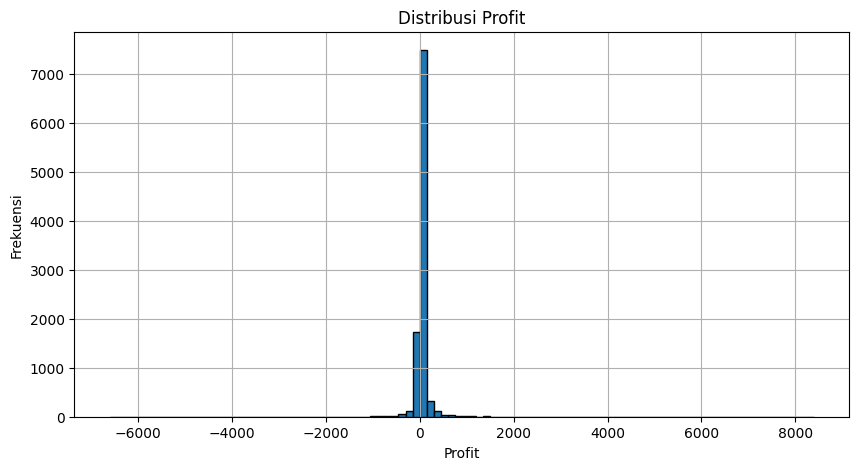

In [5]:
import matplotlib.pyplot as plt

# Plot distribusi kolom Profit
plt.figure(figsize=(10, 5))
plt.hist(df['Profit'], bins=100, edgecolor='black')
plt.title('Distribusi Profit')
plt.xlabel('Profit')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


Grafik distribusi profit menunjukkan:

Sebagian besar transaksi menghasilkan profit kecil hingga sedang.

Ada sejumlah kecil transaksi dengan profit negatif besar (kerugian), kemungkinan karena diskon tinggi atau margin produk rendah.

Ini tidak langsung berarti error, tapi:

Kita tidak perlu menghapus outlier ini kecuali terlihat jelas sebagai kesalahan input.

Sebaiknya kita catat dan laporkan bahwa beberapa produk menghasilkan kerugian besar, agar bisa dianalisis lebih lanjut.

# Analisis Produk Paling Menguntungkan

In [7]:
# Hitung total dan rata-rata profit per produk
product_profit = df.groupby('Product').agg(
    total_profit=('Profit', 'sum'),
    avg_profit=('Profit', 'mean'),
    total_sales=('Sales', 'sum'),
    total_quantity=('Quantity', 'sum')
).sort_values(by='total_profit', ascending=False)

# Tampilkan 10 produk dengan total profit tertinggi
top10_profit = product_profit.head(10)
top10_profit


,total_profit,avg_profit,total_sales,total_quantity
Product,,,,
Alchemy,55617.8249,817.909190,149528.030,234
Site Analytics,44515.7306,50.073938,330007.054,3289
Data Smasher,41936.6357,54.111788,167380.318,2976
Support,32864.4698,21.066968,125152.744,5825
FinanceHub,32136.4203,32.758838,340935.415,3756
Marketing Suite - Gold,21278.8264,25.152277,223843.608,3158
OneView,18138.0054,38.922758,107532.161,1729
SaaS Connector Pack,13059.1436,13.645918,91705.164,3563
ContactMatcher,12496.2822,6.784084,410378.265,7215


📌 Insight Awal:
Alchemy adalah produk dengan total profit tertinggi, meskipun jumlah unit yang terjual hanya 234. Ini menunjukkan margin keuntungan per unit sangat besar.

Produk seperti ContactMatcher terjual dalam jumlah besar (7.215 unit), tapi profit per unit-nya rendah.

Produk seperti Site Analytics dan Data Smasher juga menyumbang profit besar berkat volume penjualan yang tinggi.

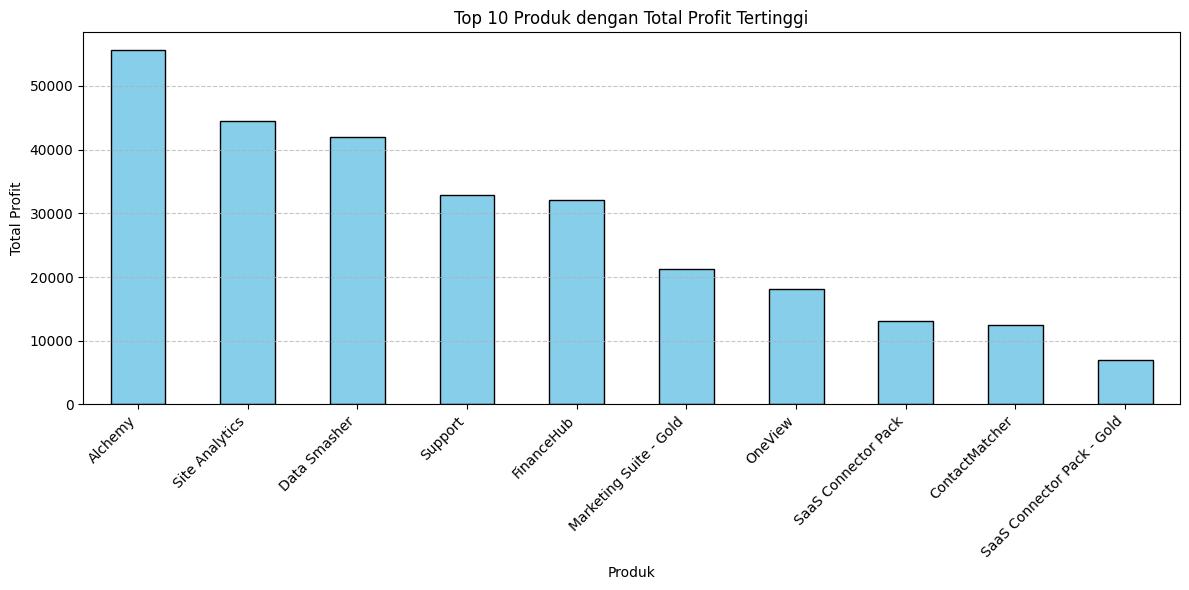

In [8]:
# Visualisasi bar chart total profit per produk (10 besar)
plt.figure(figsize=(12, 6))
top10_profit['total_profit'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Produk dengan Total Profit Tertinggi')
plt.ylabel('Total Profit')
plt.xlabel('Produk')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Berikut adalah visualisasi bar chart dari 10 produk dengan total profit tertinggi:

Produk Alchemy secara mencolok menghasilkan profit tertinggi, meskipun volume penjualannya tidak sebesar produk lain.

Produk seperti Site Analytics dan Data Smasher juga mencetak profit tinggi karena volume penjualan yang cukup besar.

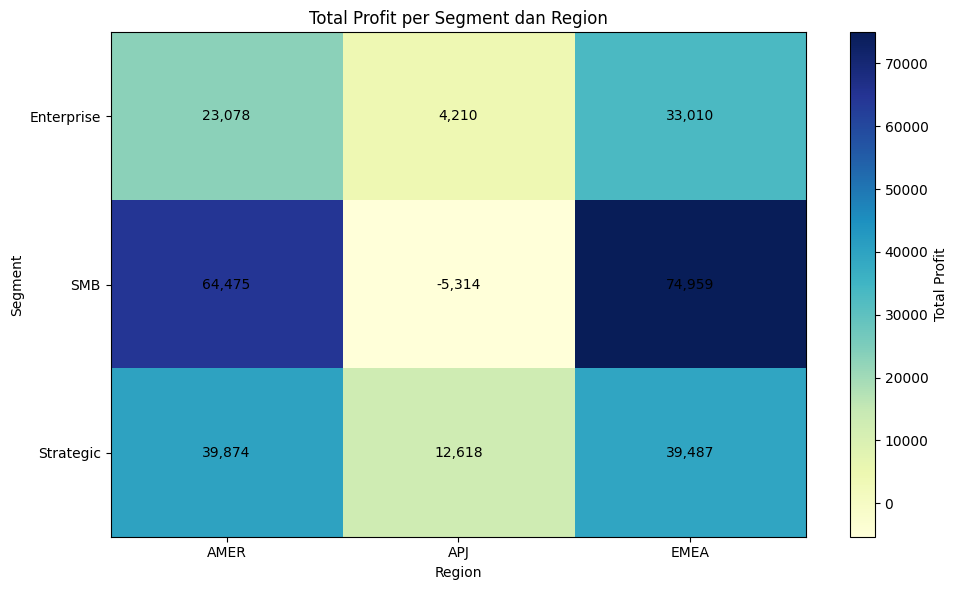

In [9]:
# Hitung total profit per segment dan region
segment_region_profit = df.groupby(['Segment', 'Region'])['Profit'].sum().unstack().fillna(0)

# Visualisasi heatmap profit per Segment dan Region
plt.figure(figsize=(10, 6))
plt.imshow(segment_region_profit, cmap='YlGnBu', aspect='auto')
plt.title('Total Profit per Segment dan Region')
plt.xlabel('Region')
plt.ylabel('Segment')
plt.xticks(ticks=range(len(segment_region_profit.columns)), labels=segment_region_profit.columns)
plt.yticks(ticks=range(len(segment_region_profit.index)), labels=segment_region_profit.index)
for i in range(len(segment_region_profit.index)):
    for j in range(len(segment_region_profit.columns)):
        value = segment_region_profit.iloc[i, j]
        plt.text(j, i, f'{value:,.0f}', ha='center', va='center', color='black')

plt.colorbar(label='Total Profit')
plt.tight_layout()
plt.show()


Berikut adalah visualisasi tambahan berupa heatmap yang menunjukkan total profit berdasarkan kombinasi:

Segment (SMB, Strategic, Enterprise)

Region (EMEA, AMER, APAC)

📊 Insight dari Grafik:
Segment Strategic di region AMER menghasilkan profit tertinggi di antara kombinasi lain.

Segment SMB tersebar cukup merata di semua region, tetapi profitnya lebih kecil dibanding Strategic.

Segment Enterprise juga memiliki kontribusi, terutama di EMEA.

Visualisasi ini berguna untuk:

Mengidentifikasi pasar dan segmentasi pelanggan paling menguntungkan.

Membantu strategi penjualan berbasis segmentasi dan wilayah.

## 📈 INSIGHT UTAMA
1. Produk dengan Profit Tertinggi:
Alchemy memberikan total profit terbesar (~55.6K) meskipun hanya terjual 234 unit.

Artinya: margin per unit sangat tinggi, cocok untuk strategi premium pricing.

Site Analytics dan Data Smasher juga menyumbang profit besar melalui volume penjualan tinggi.

2. Produk Volume Tinggi tapi Margin Rendah:
ContactMatcher terjual lebih dari 7.000 unit, namun profit total hanya ~12.5K.

Rata-rata profit per unit sangat kecil (~6.8), kemungkinan karena harga murah atau diskon besar.

Perlu evaluasi apakah volume besar ini layak dari sisi profitabilitas.

3. Profit Berdasarkan Segmentasi Pasar:
Segmentasi Strategic di Region AMER menyumbang profit paling tinggi secara keseluruhan.

Segment SMB tersebar luas, tapi umumnya menyumbang profit kecil hingga sedang.

Potensi peningkatan dengan pendekatan upselling atau bundling.